<a href="https://colab.research.google.com/github/luisahamon/Estudo-Processamento-de-Imagens/blob/main/Processamento_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1

In [ ]:
from PIL import Image

Carregar e mostrar a imagem

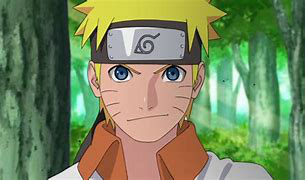

In [ ]:
imagem = Image.open('naruto.jpg')
imagem

Pegar o RGB de um Pixel

In [ ]:
print(imagem.getpixel((100,100)))

(160, 154, 92)


#Aula 2

Aplicação de alguns filtros 

In [ ]:
from PIL import ImageFilter

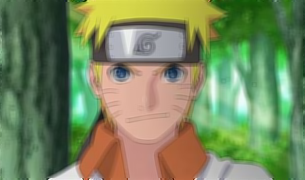

In [ ]:
filtrada = imagem.filter(ImageFilter.BLUR) #faz um borramento na imagem
filtrada

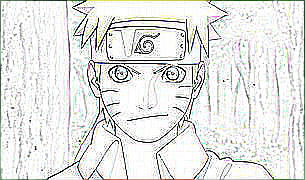

In [ ]:
filtrada2 = imagem.filter(ImageFilter.CONTOUR) #deixar apenas os contornos
filtrada2

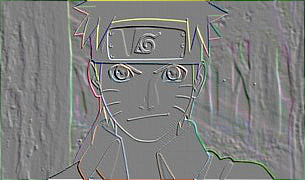

In [ ]:
filtrada3 = imagem.filter(ImageFilter.EMBOSS) #imagem com relevo
filtrada3

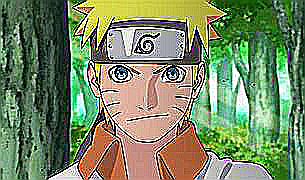

In [ ]:
filtrada4 = imagem.filter(ImageFilter.EDGE_ENHANCE_MORE) #destacar arestas
filtrada4

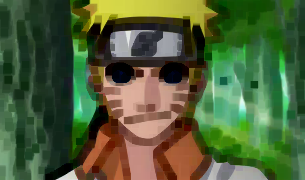

In [ ]:
filtrada5 = imagem.filter(ImageFilter.MinFilter(7)) #manipulação de cor por pixel
filtrada5

#Aula 3

Filtro de Borramento - usado no pré processamento
aplicações: borrar placas de veículos; borrar rostos de pessoas que não querem ser identificadas

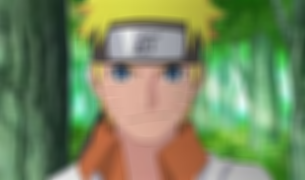

In [ ]:
filtrada6 = imagem.filter(ImageFilter.BoxBlur(5)) #a função BoxBlur faz um fitro convolucional para borrar
#recebe como parametro o r, quanto maior mais borrada ficará a imagem
filtrada6

A diferença do BoxBlur para o BLUR é poder definir esse r, ou seja, a intensidade do borramento

#Aula 4

Detecção de Arestas

1) converte a imgem para tons de cinza

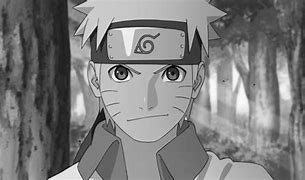

In [ ]:
imagem_cinza = Image.open('naruto.jpg').convert('L')
imagem_cinza

2) aplicando Filtros

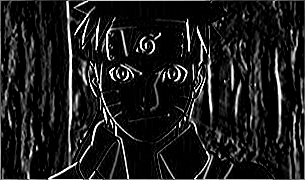

In [ ]:
filtrada7_black = imagem_cinza.filter(ImageFilter.Kernel(
                                (3,3),
                                [-1, 0, 1,
                                 -2, 0, 2,
                                 -1, 0, 1],
                                 1,
                                 offset= 1
                                ))
filtrada7_black

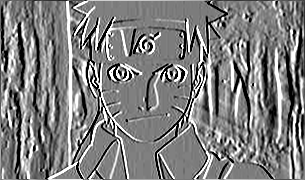

In [ ]:
filtrada7_gray = imagem_cinza.filter(ImageFilter.Kernel(
                                (3,3),
                                [-1, 0, 1,
                                 -2, 0, 2,
                                 -1, 0, 1],
                                 1,
                                 offset= 128 # esse parâmetro controla a escala de cor que será uilizada
                                ))
filtrada7_gray

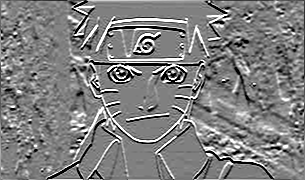

In [ ]:
filtrada7_horizontal = imagem_cinza.filter(ImageFilter.Kernel(
                                (3,3),
                                [-1, -2, -1,
                                 0, 0, 0,
                                 1, 2, 1],
                                 1,
                                 offset= 128
                                ))
filtrada7_horizontal
#mudando os valores da matriz mudamos o sentido das linhas que o modelo deve dar mais peso

Aqui ele perde a definição nas linhas das árvores que são majoritariamente verticais e destaca o rosto do personagem

**Destecando arestas horizontais e arestas verticais**

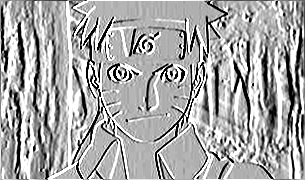

In [ ]:
from math import sqrt
w, h = imagem_cinza.size
nova_imagem = Image.new('L',(w,h))
for i in range(w):
  for j in range(h):
    valor = sqrt(filtrada7_gray.getpixel((i,j))**2 + filtrada7_gray.getpixel((i,j))**2)
    valor = int(min(valor,255))
    nova_imagem.putpixel((i,j), valor)
nova_imagem